# Origin-destination data analysis

## Basic sf operations

In [ ]:
## Python 3.11.13
# Install necessary packages (uncomment if not already installed)
# !pip install geopandas pandas matplotlib seaborn
import geopandas as gpd       # vector data package
import pandas as pd           # data manipulation
import matplotlib.pyplot as plt  # plotting
import seaborn as sns            # advanced plotting
import statsmodels.api as sm
# For spatial data, geopandas comes with sample datasets
# Alternatively, we can use the naturalearth datasets
import geopandas.datasets

In [4]:
world = gpd.read_file(
    'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
)

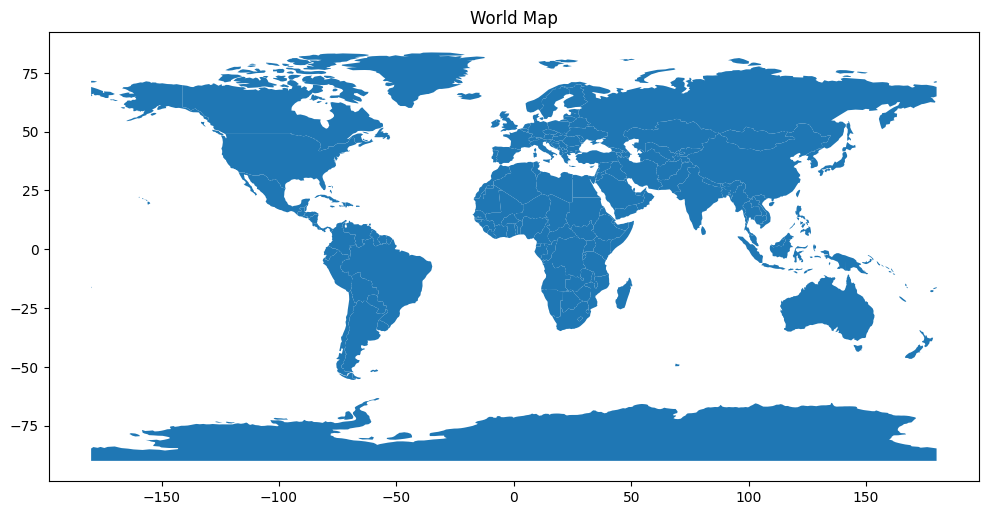

In [7]:
world = gpd.read_file(
    'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
)
# print(type(world))       # Equivalent to class(world)
# print(world.shape)       # Equivalent to dim(world)
# print(world.head())      # Equivalent to head(world)
# print(world.describe())  # Equivalent to summary(world)

# Plotting the world GeoDataFrame
world.plot(figsize=(12, 8))
plt.title('World Map')
plt.show()

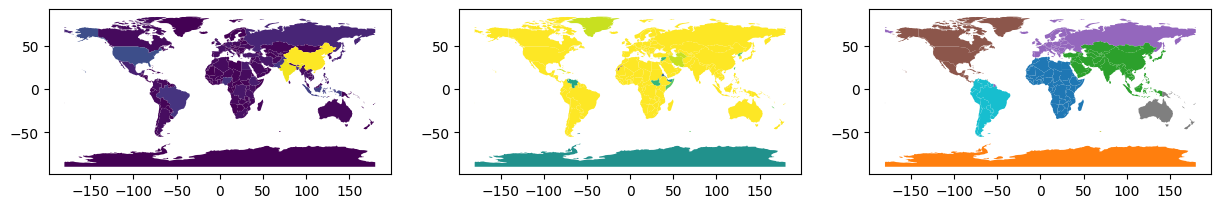

In [8]:
# Since world is a GeoDataFrame, we can select columns by position
# However, GeoPandas plots the geometry, so we need to specify columns
world = gpd.read_file('https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
world.plot(column='POP_EST', ax=axes[0])
world.plot(column='GDP_YEAR', ax=axes[1])
world.plot(column='CONTINENT', ax=axes[2])
plt.show()

In [9]:
nz = gpd.read_file("https://github.com/Nowosad/spData_files/raw/refs/heads/main/data/nz.gpkg")
nz_height = gpd.read_file("https://github.com/Nowosad/spData_files/raw/refs/heads/main/data/nz_height.gpkg")

In [18]:
canterbury = nz[nz['Name'] == 'Canterbury']


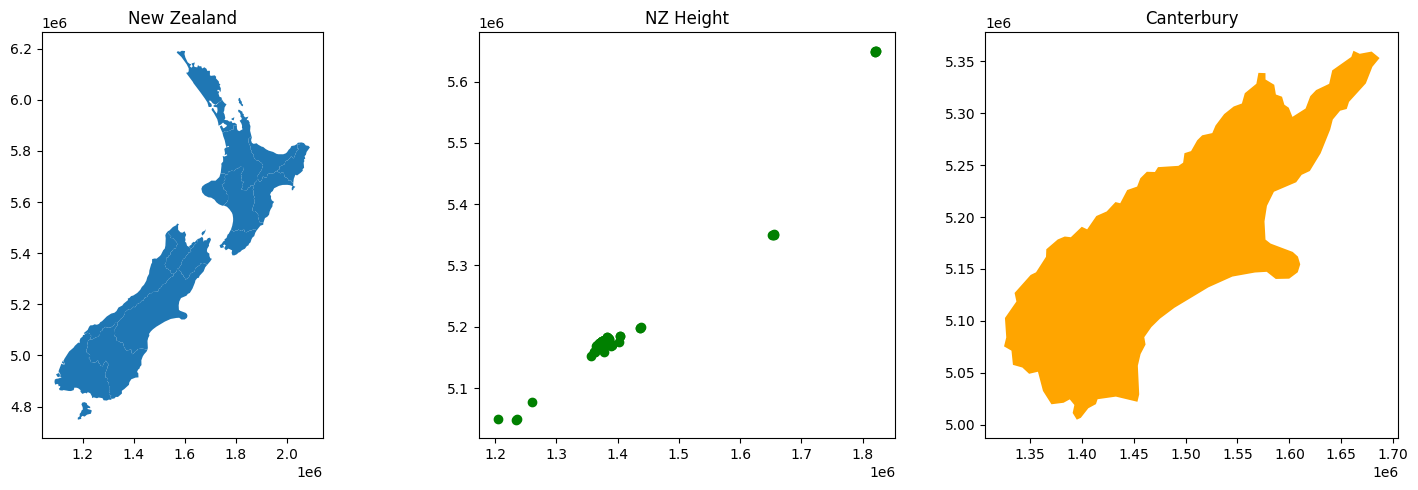

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
nz.plot(ax=axes[0])
axes[0].set_title('New Zealand')
nz_height.plot(ax=axes[1], color='green')
axes[1].set_title('NZ Height')
canterbury.plot(ax=axes[2], color='orange')
axes[2].set_title('Canterbury')
plt.tight_layout()
plt.show()

In [21]:
canterbury_height = gpd.overlay(nz_height, canterbury, how='intersection')

In [13]:
canterbury_height = gpd.sjoin(nz_height, canterbury, predicate='intersects')

In [29]:
canterbury_height.head()

,t50_fid,elevation,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
0,2362630,2749,Canterbury,South,44504.499091,612000.0,30100,0.975327,POINT (1378169.6 5158491.453)
1,2362814,2822,Canterbury,South,44504.499091,612000.0,30100,0.975327,POINT (1389460.041 5168749.086)
2,2362817,2778,Canterbury,South,44504.499091,612000.0,30100,0.975327,POINT (1390166.225 5169466.158)
3,2363991,3004,Canterbury,South,44504.499091,612000.0,30100,0.975327,POINT (1372357.036 5172728.743)
4,2363993,3114,Canterbury,South,44504.499091,612000.0,30100,0.975327,POINT (1372062.487 5173236.285)


## Getting started with OD data

In [22]:
import pandas as pd
od_data = pd.read_csv('https://github.com/ropensci/stplanr/releases/download/v1.2.2/od_data_sample.csv')
od_data.head()


,Unnamed: 0,geo_code1,geo_code2,all,from_home,light_rail,train,bus,taxi,motorbike,car_driver,car_passenger,bicycle,foot,other,geo_name1,geo_name2,la_1,la_2
0,1,E02002361,E02002361,109,0,0,0,4,2,0,39,3,2,59,0,Leeds 032,Leeds 032,Leeds,Leeds
1,2,E02002361,E02002363,38,0,0,1,4,1,0,24,4,0,4,0,Leeds 032,Leeds 034,Leeds,Leeds
2,3,E02002361,E02002367,10,0,0,0,1,0,0,8,0,0,1,0,Leeds 032,Leeds 038,Leeds,Leeds
3,4,E02002361,E02002371,44,0,0,0,2,2,0,28,3,3,6,0,Leeds 032,Leeds 042,Leeds,Leeds
4,5,E02002361,E02002377,34,0,0,0,0,1,2,19,3,0,9,0,Leeds 032,Leeds 048,Leeds,Leeds


In [23]:
od_data.rename(columns={'foot': 'walk'}, inplace=True)

In [24]:
od_data_walk = od_data[od_data['walk'] > 0].copy()
od_data_walk = od_data_walk[['geo_code1', 'geo_code2', 'all', 'car_driver', 'walk']]
od_data_walk['proportion_walk'] = od_data_walk['walk'] / od_data_walk['all']
od_data_walk['proportion_drive'] = od_data_walk['car_driver'] / od_data_walk['all']

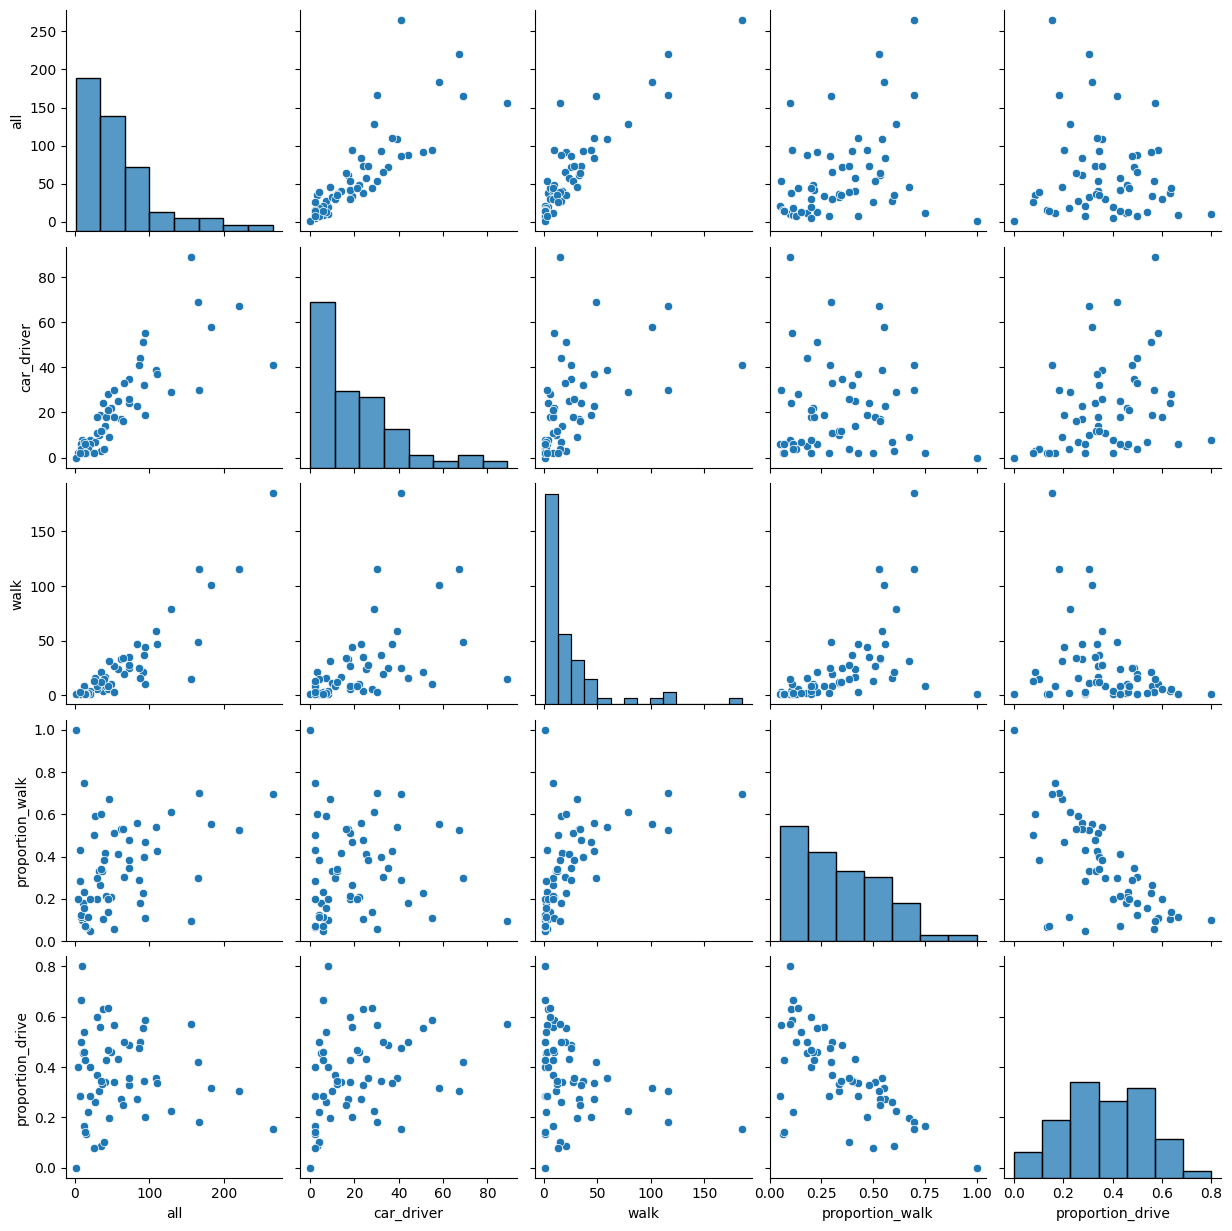

In [25]:
sns.pairplot(od_data_walk)
plt.show()

In [27]:
import statsmodels.formula.api as smf

model1 = smf.ols('proportion_walk ~ proportion_drive', data=od_data_walk).fit()
od_data_walk['proportion_walk_predicted'] = model1.fittedvalues

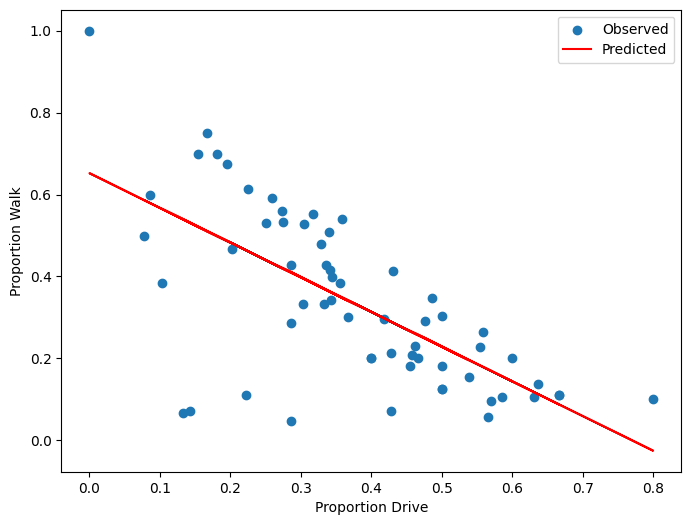

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(od_data_walk['proportion_drive'], od_data_walk['proportion_walk'], label='Observed')
plt.plot(od_data_walk['proportion_drive'], od_data_walk['proportion_walk_predicted'], color='red', label='Predicted')
plt.xlabel('Proportion Drive')
plt.ylabel('Proportion Walk')
plt.legend()
plt.show()

## Exercises

In [31]:
# Exercise 1
type(od_data)

pandas.core.frame.DataFrame

In [ ]:
# Exercise 2
od_data_walk_positive = od_data[od_data['walk'] > 0].copy()

percent_walk_positive = (len(od_data_walk_positive) / len(od_data)) * 100
print(f"Percentage of OD pairs with at least 1 person walking: {percent_walk_positive:.2f}%")


Percentage of OD pairs with at least 1 person walking: 95.31%


In [ ]:
# Exercise 3
od_data_bicycle_positive = od_data[od_data['bicycle'] > 0].copy()

percent_bicycle_positive = (len(od_data_bicycle_positive) / len(od_data)) * 100
print(f"Percentage of OD pairs with at least 1 person bicycling: {percent_bicycle_positive:.2f}%")


Percentage of OD pairs with at least 1 person bicycling: 46.88%


In [44]:
od_data_cycle_positive = od_data[od_data['bicycle'] > 0].copy()
od_data_cycle_positive['percent_cycle'] = (od_data_cycle_positive['bicycle'] / od_data_cycle_positive['all']) * 100
print(od_data_cycle_positive[['geo_name1', 'geo_name2', 'bicycle', 'all', 'percent_cycle']].head())


   geo_name1  geo_name2  bicycle  all  percent_cycle
0  Leeds 032  Leeds 032        2  109       1.834862
3  Leeds 032  Leeds 042        3   44       6.818182
6  Leeds 032  Leeds 055        4   53       7.547170
8  Leeds 034  Leeds 032        1   30       3.333333
9  Leeds 034  Leeds 034        5  183       2.732240


There is not a statistically significant positive relationship between walking and cycling.


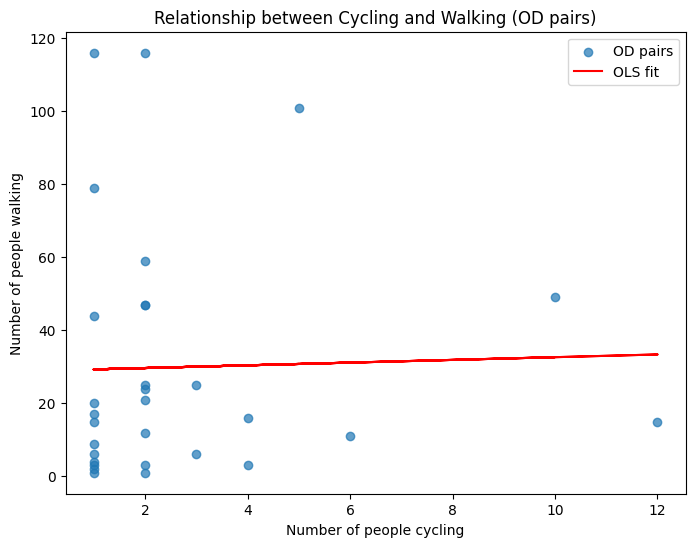

In [ ]:
# Exercise 4

od_data_walk_cycle = od_data[(od_data['walk'] > 0) & (od_data['bicycle'] > 0)].copy()

# Define independent (cycling) and dependent (walking) variables
X = od_data_walk_cycle['bicycle']
y = od_data_walk_cycle['walk']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit ordinary least squares regression
model = sm.OLS(y, X_const)
results = model.fit()

# print(results.summary())

coef = results.params['bicycle']
p_value = results.pvalues['bicycle']
if coef > 0 and p_value < 0.05:
    print("There is a positive and statistically significant relationship between walking and cycling.")
else:
    print("There is not a statistically significant positive relationship between walking and cycling.")


plt.figure(figsize=(8, 6))
plt.scatter(od_data_walk_cycle['bicycle'], od_data_walk_cycle['walk'], alpha=0.7, label='OD pairs')
plt.plot(
    od_data_walk_cycle['bicycle'],
    results.predict(sm.add_constant(od_data_walk_cycle['bicycle'])),
    color='red',
    label='OLS fit'
)
plt.xlabel('Number of people cycling')
plt.ylabel('Number of people walking')
plt.title('Relationship between Cycling and Walking (OD pairs)')
plt.legend()
plt.show()



<Axes: >

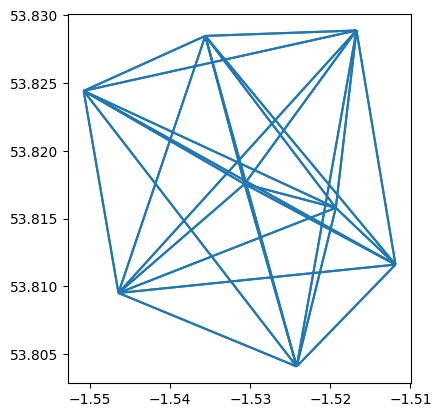

In [ ]:
# Exercise 5

from shapely.geometry import LineString

od_data = pd.read_csv('https://github.com/ropensci/stplanr/releases/download/v1.2.2/od_data_sample.csv')

zones = gpd.read_file('https://github.com/ropensci/stplanr/releases/download/v1.2.2/zones.geojson')

# Ensure the CRS is set (replace 'epsg:4326' with your actual CRS if different)
if zones.crs is None:
    zones.set_crs(epsg=4326, inplace=True)

# If zones are polygons, compute centroids
if zones.geom_type.isin(['Polygon', 'MultiPolygon']).any():
    print("Creating centroids representing desire line start and end points.")
    zones['geometry'] = zones.centroid

# Create a mapping from 'geo_cod' to 'geometry'
geo_cod_to_geometry = dict(zip(zones['geo_cod'], zones['geometry']))

# Map origin and destination geometries
od_data['geometry_o'] = od_data['geo_code1'].map(geo_cod_to_geometry)
od_data['geometry_d'] = od_data['geo_code2'].map(geo_cod_to_geometry)

# Check for any missing matches
missing_origins = od_data[od_data['geometry_o'].isnull()]
missing_destinations = od_data[od_data['geometry_d'].isnull()]

if not missing_origins.empty:
    print(f"Missing origin geometries for {len(missing_origins)} records")
if not missing_destinations.empty:
    print(f"Missing destination geometries for {len(missing_destinations)} records")

# Remove rows with missing geometries
od_data.dropna(subset=['geometry_o', 'geometry_d'], inplace=True)

# Create LineString geometries for desire lines
od_data['geometry'] = od_data.apply(
    lambda row: LineString([row['geometry_o'], row['geometry_d']]), axis=1
)

# Create a GeoDataFrame for the desire lines
desire_lines = gpd.GeoDataFrame(od_data, geometry='geometry', crs=zones.crs)

# Plot the desire lines
desire_lines.plot()